## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №16

Работа с рукописными изображениями цифр:
- Выполнить кластеризацию двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), 
- Оценить качество разбиения и выбирать оптимальное число кластеров, 
- Визуализировать промежуточные результаты.

### Описания набора данных

Набор данных `load_digits` подмодуля `datasets` библиотеки содержит 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей.  
Каждая картинка – распознанная рукописная цифра от 0 до 9, "развёрнутая" в строку так, что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64.  
Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.  
Для каждого наблюдения задано соответствующие значения целевой переменной: какую цифру изображает каждая картинка.  


### Постановка задачи
Предположим, что нам не известны истинные метки классов (цифры) и количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering, KMeans

### 1. Получение данных
В переменную `X` загрузить массив наблюдений, содержащий 1797 $\times$ 64 числа, 
а в переменную `y` – массив истинных меток классов, содержащий 1797 чисел.

In [40]:
digits = load_digits()

# признаки наблюдений(картинок)
X = digits['data']
print(f'Массив наблюдений: {X.shape}')

# целевые переменные - цифры от 0 до 9
y = digits['target']
print(f'Массив меток классов: {y.shape}')

Массив наблюдений: (1797, 64)
Массив меток классов: (1797,)


Визуализировать первые 10 картинок, расположив их в сетке 3 $\times$ 4    
Фон картинок должен быть белым, а изображения цифр – тёмными

*Указания:*
- Инвертировать цвета фона и изображения цифр
- Расположить картинки на графике функцией `plt.subplot`
- Сформировать картики из строк массива `X` методом `reshape` как матрица 8 $\times$ 8
- Отключить деления на координатных осях параметрами `xticks` и `yticks` функции `plt.subplot`
- Отключить сглаживание параметром `interpolation` функции `plt.imshow`

In [41]:
# Выполнить инверсию цвета пикселей картинки
X = 0 -X + 15

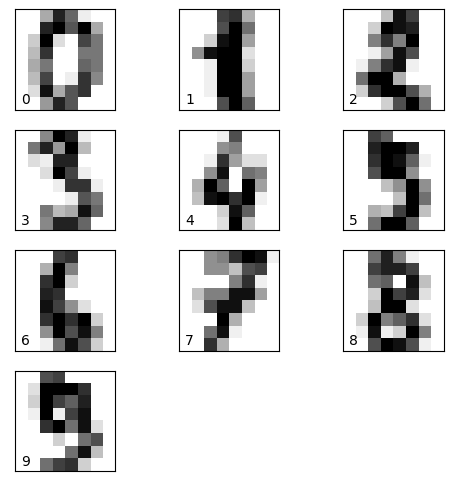

In [85]:
# Создать объект для рисования графиков
fig = plt.figure(figsize=(6, 6))

# Добавить объекты графиков,
# отобразить в них первые 10 строк массива X,
# как матрицу 8х8 пикселей в сетке 3х4 
for i in range(10):
    ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X[i],[8,8]), interpolation='none')
    # Отобразить целевую метку класса для каждой картинки
    ax.text(0, 7, str(y[i]))

## 2. Кластеризация и оценка качества

Используя алгоритмы иерархической кластеризации и $K$ средних, получить разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [82]:
kmeans = KMeans(n_clusters=10, n_init=100)
kmlabels = kmeans.fit_predict(X)
kmlabels

array([1, 2, 2, ..., 2, 7, 7])

In [83]:
agg = AgglomerativeClustering(n_clusters=10)
agglabels = agg.fit_predict(X)
agglabels

array([7, 9, 4, ..., 4, 1, 4], dtype=int64)

Визуализировать центры кластеров, полученных каждым из двух алгоритмов (Отобразить картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами).  
Прокомментировать: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- За центр кластера принять среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Для отбора наблюдений, входящих в кластер `i`, использовать индексацию по булевозначной маске. Маску получить из массива предсказанных номеров кластеров.  
- Значения пикселей центра кластера усреднять функцией `np.mean`.

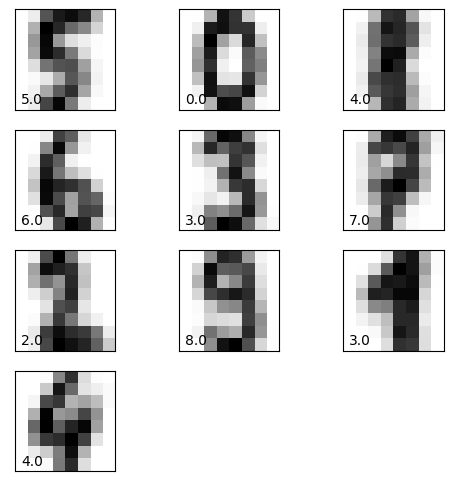

In [87]:
fig = plt.figure(figsize=(6, 6))

for i in range(10):
    ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
    # Выбор и усреднение записей из массива X по заданным индексам из массива кластеров
    ax.imshow(np.reshape(X[kmlabels == i].mean(axis=0),[8,8]), interpolation='none')
    # Отобразить усредненную целевую метку класса для каждого кластера
    ax.text(0, 7, str(y[kmlabels == i].mean().round()))

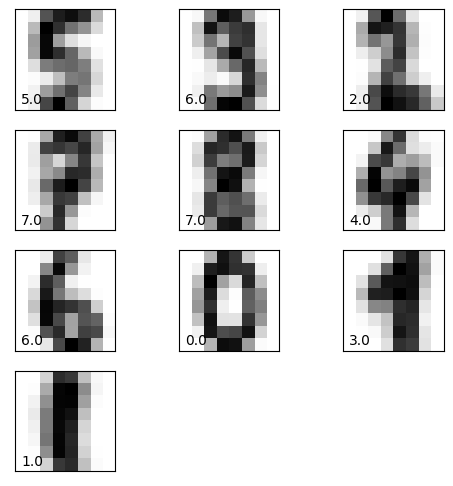

In [88]:
fig = plt.figure(figsize=(6, 6))

for i in range(10):
    ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
    # Выбор и усреднение записей из массива X по заданным индексам из массива кластеров
    ax.imshow(np.reshape(X[agglabels == i].mean(axis=0),[8,8]), interpolation='none')
    # Отобразить усредненную целевую метку класса для каждого кластера
    ax.text(0, 7, str(y[agglabels == i].mean().round()))

*Выводы:*
- Оба алгоритма дают центры кластеров в большинстве сильнее похожие начертаниями на целевые значения, чем исходные изображения 
- Результат для K-means: 7 совпадений, 1 близко (усредненное целевое значение 8 для изображения, которое ближе к 9), и 2 изображения далеки от своих целевых значений
- Результат для Агломеративной кластеризации: 6 совпадений, 1 близко (усредненное целевое значение 7 для изображения, которое ближе к 8), и 3 изображения далеки от своих целевых значений


В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M|} \sum_{x' \in M} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.


Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

*<u>Замечание:</u>* Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.


Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

# 4. Итоги

Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.